In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
datapath = "../input/seoul-bike-rental-ai-pro-iti/"
train_df = pd.read_csv(os.path.join(datapath,"train.csv"))
test_df = pd.read_csv(os.path.join(datapath,"test.csv"))

In [3]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5760.0,2879.500000,1662.913107,0.0,1439.75,2879.50,4319.250,5759.00
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00


In [4]:
train_df['Date']=pd.to_datetime(train_df['Date'], dayfirst=True)
# train_df['Date'].head(50)

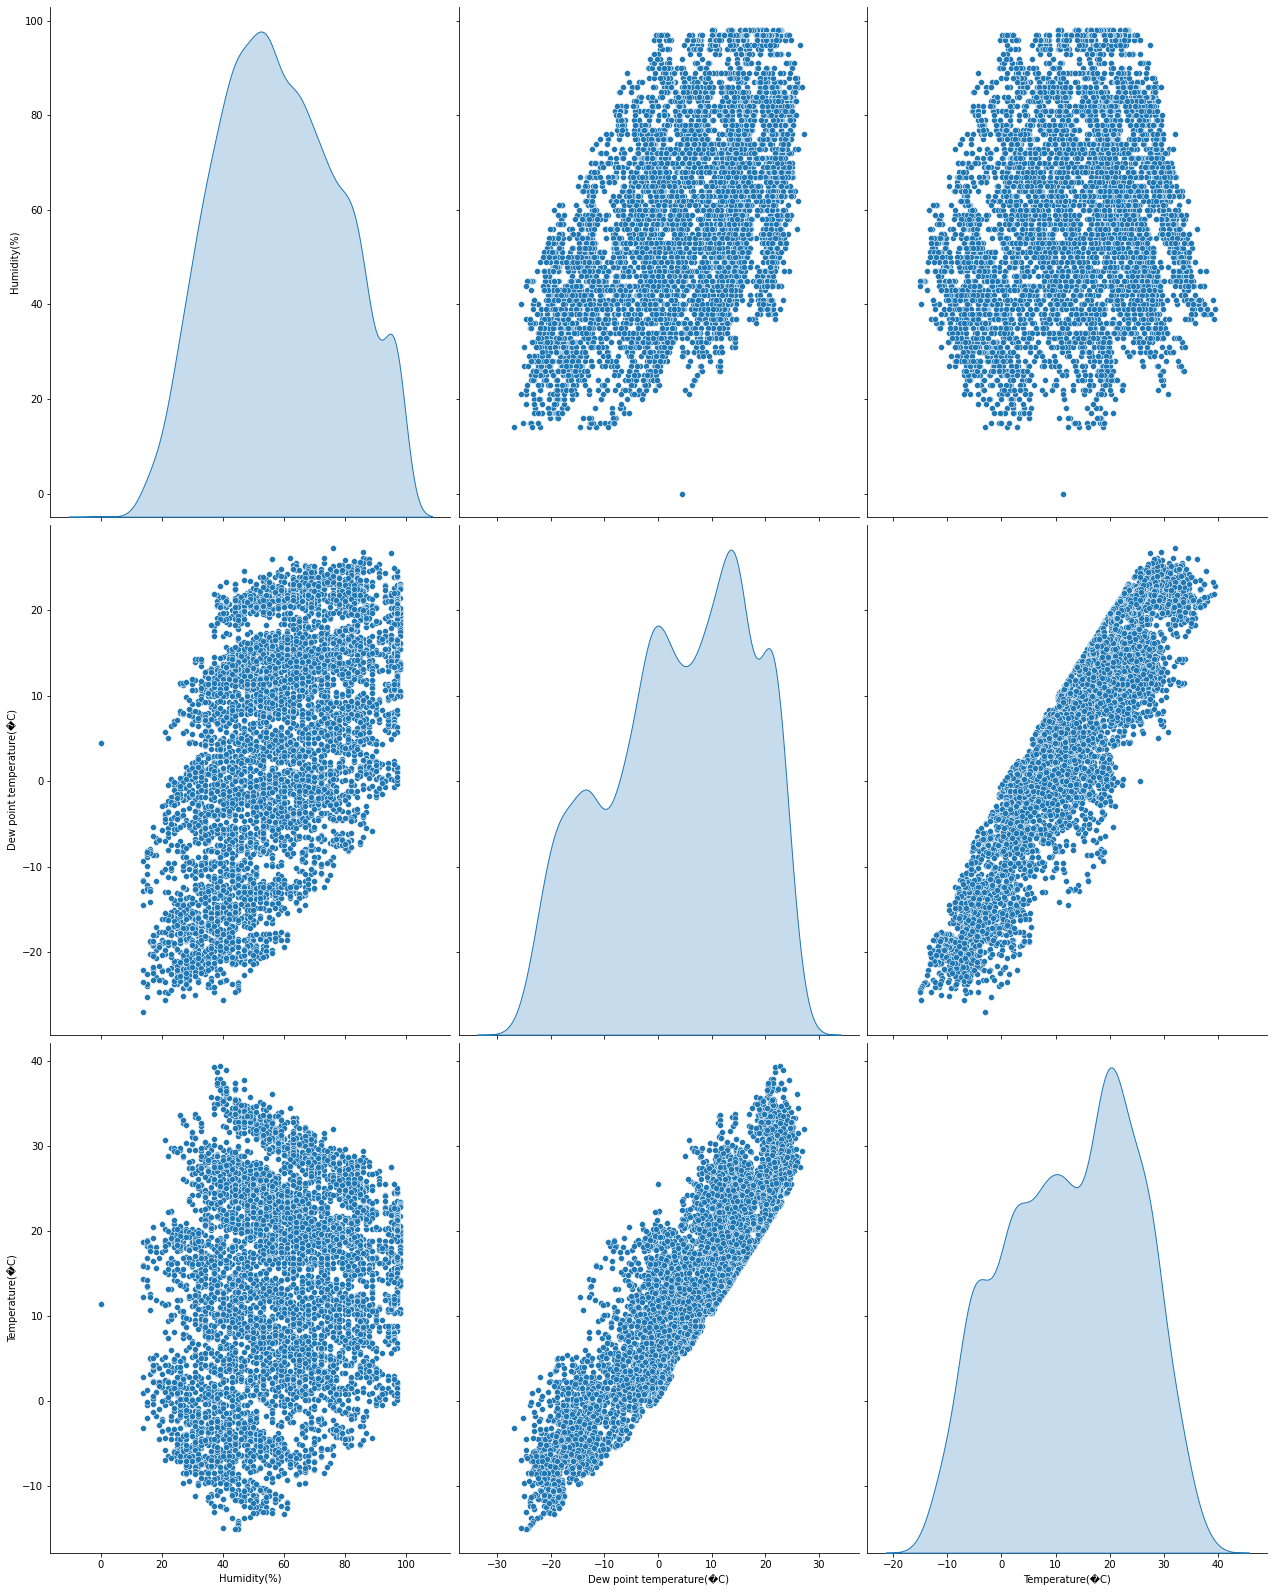

In [5]:
sns.pairplot(train_df[["Humidity(%)", "Dew point temperature(�C)", "Temperature(�C)"]], diag_kind="kde",height=7.5,aspect=0.8)

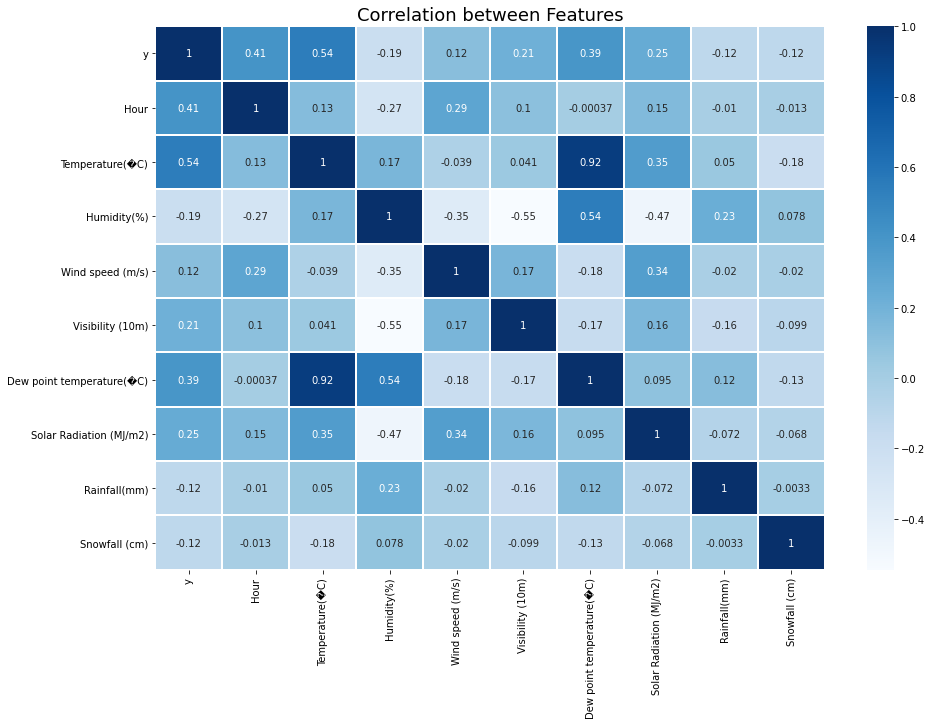

In [6]:
corr_martix = train_df.drop('ID',axis=1).corr()
plt.subplots(figsize=(15,10))
plt.title('Correlation between Features', size=18)
sns.heatmap(corr_martix,linewidths=0.01,cmap="Blues" , annot=True)
plt.show()

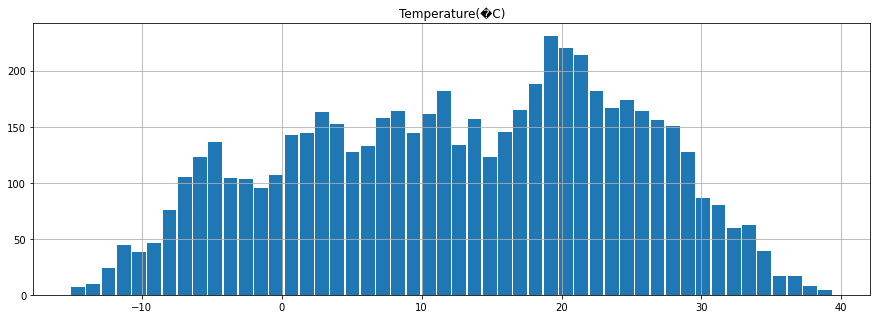

In [7]:
train_df['Temperature(�C)'].hist(bins =50 , rwidth = 0.9 ,figsize=(15,5),grid=True )
plt.title("Temperature(�C)")
plt.show()

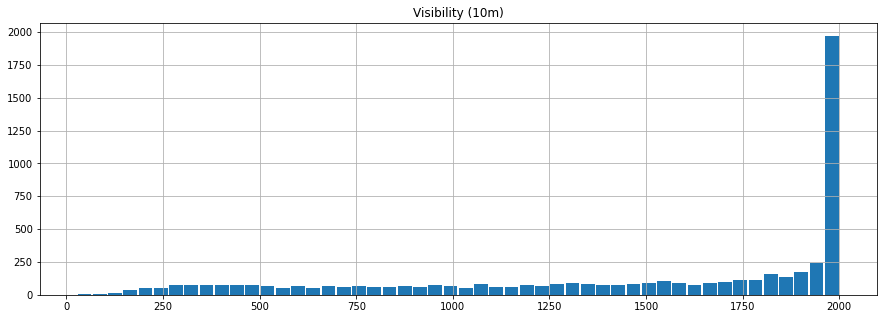

In [8]:
train_df['Visibility (10m)'].hist(bins =50 , rwidth = 0.9 ,figsize=(15,5),grid=True )
plt.title("Visibility (10m)")
plt.show()

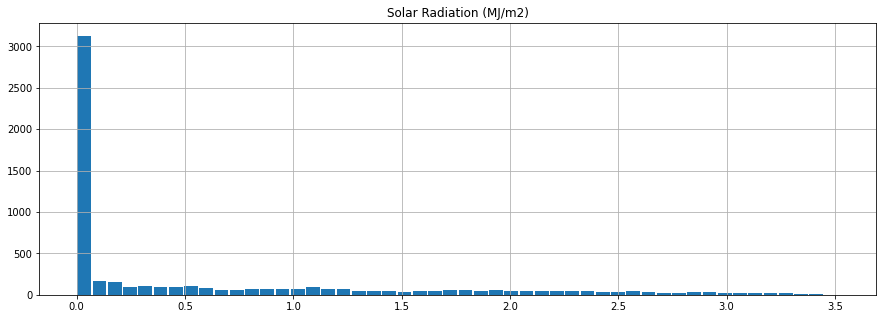

In [9]:
train_df['Solar Radiation (MJ/m2)'].hist(bins =50 , rwidth = 0.9 ,figsize=(15,5),grid=True )
plt.title("Solar Radiation (MJ/m2)")
plt.show()

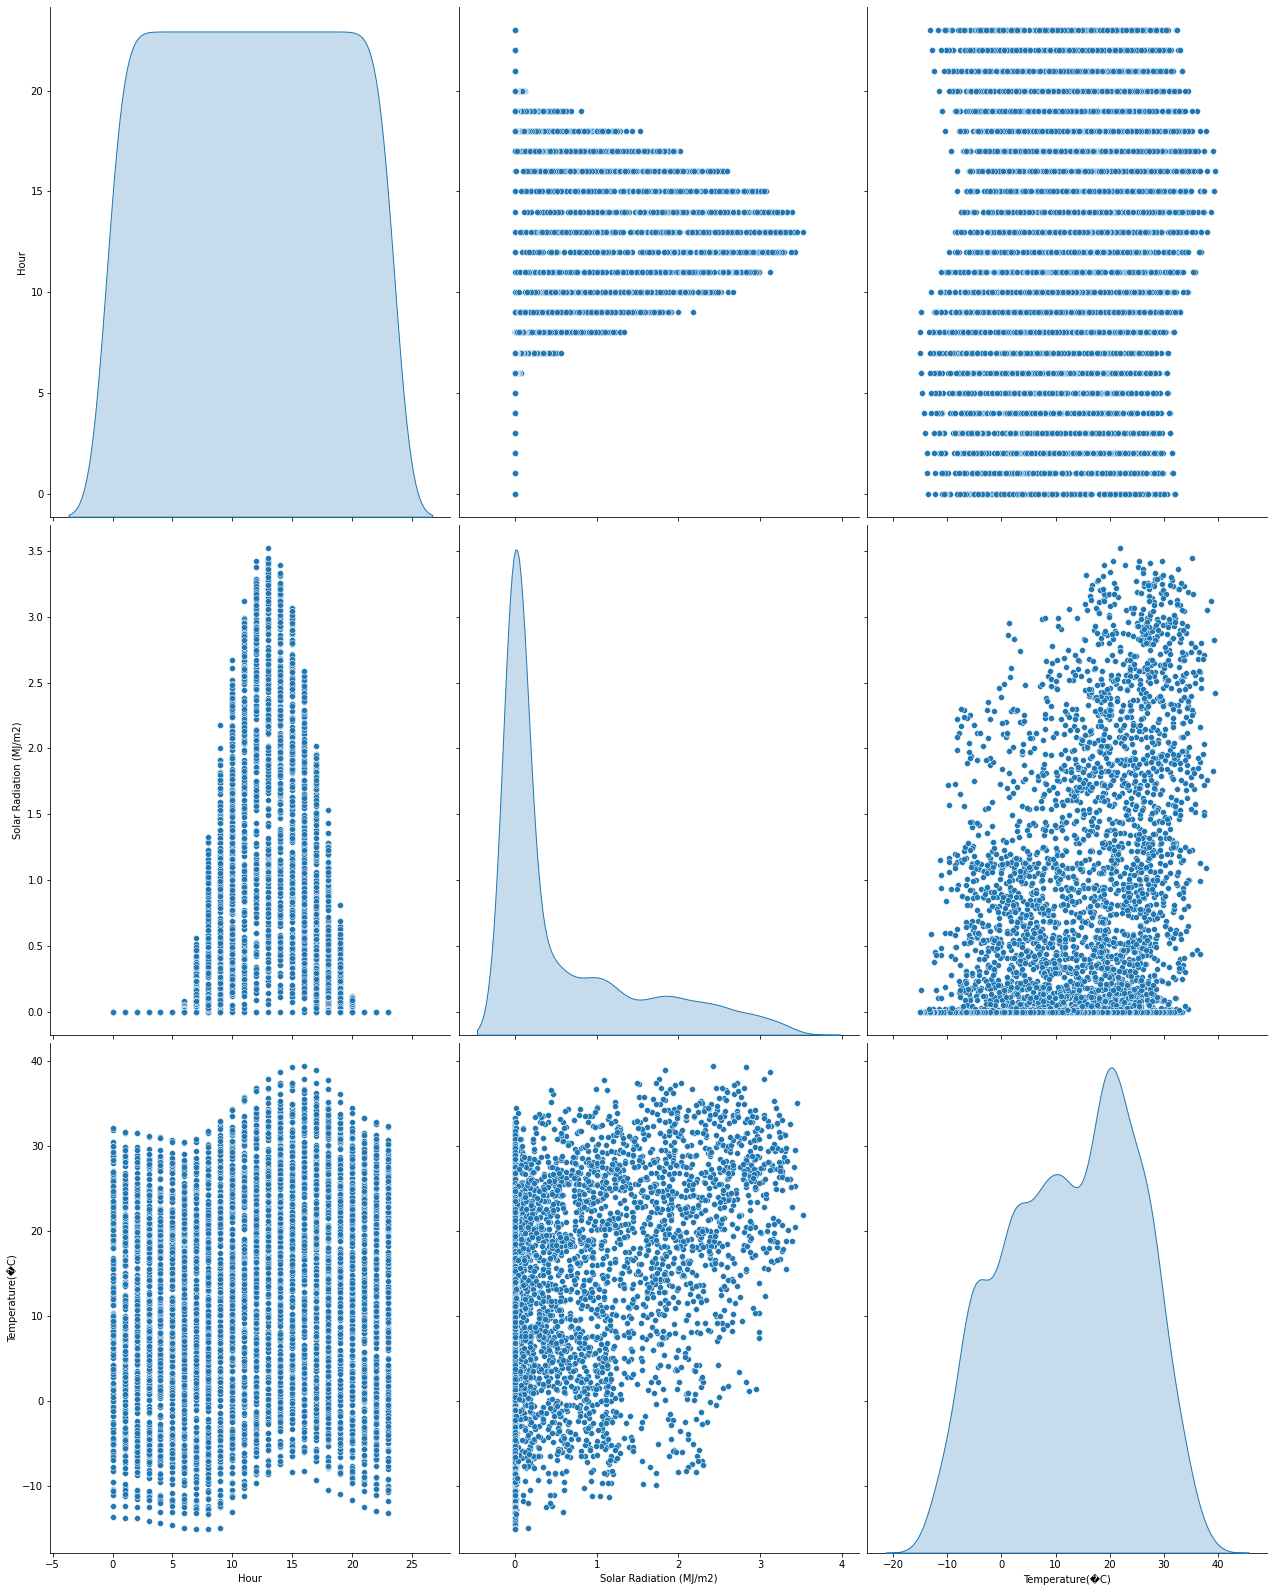

In [10]:
sns.pairplot(train_df[["Hour", "Solar Radiation (MJ/m2)", "Temperature(�C)"]], diag_kind="kde",height=7.5,aspect=0.8)

# Working on data

In [11]:
def from_C_to_F(temp):
    return ((temp * (9/5))+32)

train_df["Dew(F)"]= train_df["Dew point temperature(�C)"].apply(from_C_to_F)
train_df["temp(F)"] = train_df["Temperature(�C)"].apply(from_C_to_F)

In [12]:
train_df["comfort"] = train_df["temp(F)"]
for i in range(len(train_df["temp(F)"])) :
    if train_df["temp(F)"][i] >= 70 and train_df["Dew(F)"][i]>= 70:
        train_df["comfort"][i] = 1#"Uncomfort sticky"
    elif 65<= train_df["temp(F)"][i] <= 80 and train_df["Dew(F)"][i] <50:
        train_df["comfort"][i] = 5 #"Comfort"
    elif train_df["temp(F)"][i] > 80 :
        train_df["comfort"][i] = 3#"Uncomfort Hot"
    elif train_df["temp(F)"][i] <= 60 :
        train_df["comfort"][i] = 0#"Uncomfort cold"
    else :
        train_df["comfort"][i] = 4 #"normal"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-pa

In [13]:
train_df["fog"] = train_df["temp(F)"]
for i in range(len(train_df["Dew(F)"])):
    if train_df["temp(F)"][i] < 60 and 55 <= train_df["Dew(F)"][i] <= train_df["temp(F)"][i]:
        train_df["fog"][i]=1
#     if train_df["temp(F)"][i] < 65 and 63 <= train_df["Dew(F)"][i] <= train_df["temp(F)"][i]:
#         train_df["fog"][i]=1
#     elif train_df["temp(F)"][i] < 70 and 68 <= train_df["Dew(F)"][i] <= train_df["temp(F)"][i]:
#         train_df["fog"][i]=1
    else:
        train_df["fog"][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# preprocessing for train

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df['Seasons']= le.fit_transform(train_df['Seasons'])
train_df['Holiday']= le.fit_transform(train_df['Holiday'])
train_df['Functioning Day']= le.fit_transform(train_df['Functioning Day'])
# train_df['comfort']= le.fit_transform(train_df['comfort'])
##############################################################################
train_df["month"]=train_df.Date.dt.month
train_df["Day"]=train_df.Date.dt.day
train_df["year"]=train_df.Date.dt.year
# train_df['month'] = train_df['Date'].dt.month_name()
train_df['dayofweek'] = train_df['Date'].dt.dayofweek
##############################################################################
# for indx, i in enumerate(list(train_df["month"])):
#     if i == "February":
#         train_df["month"][indx] = 1.0
#     elif i == "January" :
#         train_df["month"][indx] = 2.0
#     elif i == "December" :
#         train_df["month"][indx] = 3.0
#     elif i == "March" :
#         train_df["month"][indx] = 4.0
#     elif i == "September" :
#         train_df["month"][indx] = 5.0
#     elif i == "November" :
#         train_df["month"][indx] = 6.0
#     elif i == "April" :
#         train_df["month"][indx] = 7.0
#     elif i == "May" :
#         train_df["month"][indx] = 8.0
#     elif i == "October" :
#         train_df["month"][indx] = 9.0
#     elif i == "August" :
#         train_df["month"][indx] = 10.0
#     elif i == "June" :
#         train_df["month"][indx] = 11.0
#     elif i == "July" :
#         train_df["month"][indx] = 12.0
# train_df["month"] = pd.to_numeric(train_df["month"])
#########################################################################


In [15]:
def wind_chill(T,V):
    wc = 13.12 + 0.6215*T - 11.37*(V**0.16) + 0.3965*T*(V**0.16)
    return wc
train_df['Wind speed (km/h)'] = train_df['Wind speed (m/s)']/3.6
train_df["wind chill"] = train_df[["Temperature(�C)",'Wind speed (km/h)']].apply(lambda x: wind_chill(x["Temperature(�C)"], x["Wind speed (km/h)"]), axis = 1)

In [16]:
# train_df[["wind chill","Temperature(�C)",'Wind speed (km/h)']]

# pre processing for testing

In [17]:
x_test = test_df.drop(columns=['ID'])
x_test

,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,21/12/2017,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
1,21/12/2017,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
2,21/12/2017,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
3,21/12/2017,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
4,21/12/2017,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2996,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2997,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2998,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [18]:
x_test["Dew(F)"]= x_test["Dew point temperature(�C)"].apply(from_C_to_F)
x_test["temp(F)"] = x_test["Temperature(�C)"].apply(from_C_to_F)
##############################################################################
x_test["comfort"] = x_test["temp(F)"]
for i in range(len(x_test["temp(F)"])) :
    if x_test["temp(F)"][i] >= 70 and x_test["Dew(F)"][i]>= 70:
        x_test["comfort"][i] = 1#"Uncomfort sticky"
    elif 65<= x_test["temp(F)"][i] <= 80 and x_test["Dew(F)"][i] <50:
        x_test["comfort"][i] = 5#"Comfort"
    elif x_test["temp(F)"][i] > 80 :
        x_test["comfort"][i] = 3#"Uncomfort Hot"
    elif x_test["temp(F)"][i] <= 60 :
        x_test["comfort"][i] = 0#"Uncomfort cold"
    else :
        x_test["comfort"][i] = 4#"normal"
##############################################################################       
x_test["fog"] = x_test["temp(F)"]
for i in range(len(x_test["Dew(F)"])):
    if x_test["temp(F)"][i] < 60 and 50 <= x_test["Dew(F)"][i] <= x_test["temp(F)"][i]:
        x_test["fog"][i]=1
    else:
        x_test["fog"][i]=0
##############################################################################        
x_test['Seasons']= le.fit_transform(x_test['Seasons'])
x_test['Holiday']= le.fit_transform(x_test['Holiday'])
x_test['Functioning Day']= le.fit_transform(x_test['Functioning Day'])
# x_test['comfort']= le.fit_transform(x_test['comfort'])
##############################################################################
x_test['Date']=pd.to_datetime(x_test['Date'], dayfirst=True)
x_test["month"]=x_test.Date.dt.month
# x_test['month'] = x_test['Date'].dt.month_name()
x_test["Day"]=x_test.Date.dt.day
x_test["year"]=x_test.Date.dt.year
x_test['dayofweek'] = x_test['Date'].dt.dayofweek
##############################################################################
# for indx, i in enumerate(list(x_test["month"])):
#     if i == "February":
#         x_test["month"][indx] = 1.0
#     elif i == "January" :
#         x_test["month"][indx] = 2.0
#     elif i == "December" :
#         x_test["month"][indx] = 3.0
#     elif i == "March" :
#         x_test["month"][indx] = 4.0
#     elif i == "September" :
#         x_test["month"][indx] = 5.0
#     elif i == "November" :
#         x_test["month"][indx] = 6.0
#     elif i == "April" :
#         x_test["month"][indx] = 7.0
#     elif i == "May" :
#         x_test["month"][indx] = 8.0
#     elif i == "October" :
#         x_test["month"][indx] = 9.0
#     elif i == "August" :
#         x_test["month"][indx] = 10.0
#     elif i == "June" :
#         x_test["month"][indx] = 11.0
#     elif i == "July" :
#         x_test["month"][indx] = 12.0
# x_test["month"] = pd.to_numeric(x_test["month"])
##############################################################################
x_test['Wind speed (km/h)'] = x_test['Wind speed (m/s)']/3.6
x_test["wind chill"] = x_test[["Temperature(�C)",'Wind speed (km/h)']].apply(lambda x: wind_chill(x["Temperature(�C)"], x["Wind speed (km/h)"]), axis = 1)
##############################################################################


# x_test["temp"] = x_test["Temperature(�C)"]
# x_test["dew"] = x_test["Dew point temperature(�C)"]
# x_test = x_test.drop(["Date","Dew(F)","fog","comfort","temp(F)",'Temperature(�C)','Dew point temperature(�C)'], axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/

# take another look

In [19]:
display(train_df.describe().T)
display(x_test.describe().T)

,count,mean,std,min,25%,50%,75%,max
ID,5760.0,2879.500000,1662.913107,0.000000,1439.750000,2879.500000,4319.250000,5759.000000
y,5760.0,703.483854,655.249491,0.000000,188.000000,485.500000,1066.000000,3556.000000
Hour,5760.0,11.500000,6.922788,0.000000,5.750000,11.500000,17.250000,23.000000
Temperature(�C),5760.0,12.803559,11.902206,-15.100000,3.200000,13.700000,22.225000,39.400000
Humidity(%),5760.0,58.361806,19.840167,0.000000,43.000000,57.000000,73.000000,98.000000
Wind speed (m/s),5760.0,1.723333,1.047898,0.000000,0.900000,1.500000,2.300000,7.400000
Visibility (10m),5760.0,1473.711458,585.879880,27.000000,1025.750000,1732.000000,2000.000000,2000.000000
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.900000,-5.400000,5.200000,14.700000,27.200000
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.000000,0.000000,0.010000,0.940000,3.520000
Rainfall(mm),5760.0,0.135122,1.075320,0.000000,0.000000,0.000000,0.000000,35.000000


,count,mean,std,min,25%,50%,75%,max
Hour,3000.0,11.500000,6.923341,0.000000,5.750000,11.500000,17.250000,23.000000
Temperature(�C),3000.0,13.035300,12.026752,-17.800000,3.900000,13.950000,22.900000,38.000000
Humidity(%),3000.0,57.966000,21.330288,0.000000,40.000000,58.000000,76.000000,98.000000
Wind speed (m/s),3000.0,1.727933,1.013826,0.000000,0.900000,1.500000,2.400000,6.900000
Visibility (10m),3000.0,1366.005333,643.374688,33.000000,779.000000,1591.500000,2000.000000,2000.000000
Dew point temperature(�C),3000.0,4.103667,13.170840,-30.600000,-3.900000,4.900000,15.600000,26.800000
Solar Radiation (MJ/m2),3000.0,0.562940,0.866555,0.000000,0.000000,0.010000,0.910000,3.520000
Rainfall(mm),3000.0,0.174733,1.223086,0.000000,0.000000,0.000000,0.000000,29.500000
Snowfall (cm),3000.0,0.130300,0.592634,0.000000,0.000000,0.000000,0.000000,8.800000
Seasons,3000.0,1.488000,1.107368,0.000000,1.000000,1.000000,2.000000,3.000000


In [20]:
display(train_df.groupby(["Date","year","month","Day"]).mean().head(50))
display(x_test.groupby(["month","Day"]).count())

,,,,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons,Holiday,Functioning Day,Dew(F),temp(F),comfort,fog,dayofweek,Wind speed (km/h),wind chill
Date,year,month,Day,,,,,,,,,,,,,,,,,,,,,
2017-12-01,2017,12,1,11.5,397.458333,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,...,3.0,1.0,1.0,7.6175,27.5825,0.0,0.0,4.0,0.427083,1.023616
2017-12-02,2017,12,2,35.5,355.125000,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,...,3.0,1.0,1.0,21.7100,34.3850,0.0,0.0,5.0,0.475694,4.382958
2017-12-03,2017,12,3,59.5,300.916667,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,...,3.0,1.0,1.0,35.3900,40.7750,0.0,0.0,6.0,0.447917,7.874160
2017-12-04,2017,12,4,83.5,363.708333,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,...,3.0,1.0,1.0,14.1350,31.4525,0.0,0.0,0.0,0.958333,1.665244
2017-12-05,2017,12,5,107.5,346.125000,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,...,3.0,1.0,1.0,0.6350,23.9750,0.0,0.0,1.0,0.307870,4.293817
2017-12-06,2017,12,6,131.5,277.875000,11.5,0.045833,70.791667,0.695833,1186.875000,-5.187500,0.255833,0.054167,...,3.0,1.0,1.0,22.6625,32.0825,0.0,0.0,2.0,0.193287,8.584774
2017-12-07,2017,12,7,155.5,356.208333,11.5,1.091667,67.541667,1.691667,949.416667,-5.012500,0.243750,0.000000,...,3.0,1.0,1.0,22.9775,33.9650,0.0,0.0,3.0,0.469907,4.372702
2017-12-08,2017,12,8,179.5,334.666667,11.5,-3.825000,41.750000,1.850000,1872.208333,-15.366667,0.287083,0.000000,...,3.0,1.0,1.0,4.3400,25.1150,0.0,0.0,4.0,0.513889,-0.616631
2017-12-09,2017,12,9,203.5,301.375000,11.5,-0.845833,46.000000,1.079167,1860.958333,-11.233333,0.263333,0.000000,...,3.0,1.0,1.0,11.7800,30.4775,0.0,0.0,5.0,0.299769,3.124230


Date  Hour  Temperature(�C)  Humidity(%)  Wind speed (m/s)  \
month Day                                                               
1     21     24    24               24           24                24   
      22     24    24               24           24                24   
      23     24    24               24           24                24   
      24     24    24               24           24                24   
      25     24    24               24           24                24   
...         ...   ...              ...          ...               ...   
12    27     24    24               24           24                24   
      28     24    24               24           24                24   
      29     24    24               24           24                24   
      30     24    24               24           24                24   
      31     24    24               24           24                24   

           Visibility (10m)  Dew point temperature(�C)  \
month Day                                                
1     21                 24                         24   
      22                 24                         24   
      23                 24                         24   
      24                 24                         24   
      25                 24                         24   
...                     ...                        ...   
12    27                 24                         24   
      28                 24                         24   
      29                 24                         24   
      30                 24                         24   
      31                 24                         24   

           Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  ...  Holiday  \
month Day                                                        ...            
1     21                        24            24             24  ...       24   
      22                        24            24             24  ...       24   
      23                        24            24             24  ...       24   
      24                        24            24             24  ...       24   
      25                        24            24             24  ...       24   
...                            ...           ...            ...  ...      ...   
12    27                        24            24             24  ...       24   
      28                        24            24             24  ...       24   
      29                        24            24             24  ...       24   
      30                        24            24             24  ...       24   
      31                        24            24             24  ...       24   

           Functioning Day  Dew(F)  temp(F)  comfort  fog  year  dayofweek  \
month Day                                                                    
1     21                24      24       24       24   24    24         24   
      22                24      24       24       24   24    24         24   
      23                24      24       24       24   24    24         24   
      24                24      24       24       24   24    24         24   
      25                24      24       24       24   24    24         24   
...                    ...     ...      ...      ...  ...   ...        ...   
12    27                24      24       24       24   24    24         24   
      28                24      24       24       24   24    24         24   
      29                24      24       24       24   24    24         24   
      30                24      24       24       24   24    24         24   
      31                24      24       24       24   24    24         24   

           Wind speed (km/h)  wind chill  
month Day                                 
1     21                  24          24  
      22                  24          24  
      23                  24          24  
      24              

In [21]:
# corr_martix = train_df.drop('ID',axis=1).corr()
# plt.subplots(figsize=(15,10))
# plt.title('Correlation between Features', size=18)
# sns.heatmap(corr_martix,linewidths=0.01,cmap="Blues" , annot=True)
# plt.show()

In [22]:
# nwe model mixed data 
train_df["data_type"] = "train"
x_test["data_type"] = "test"

train_new_model = train_df
test_new_model = x_test

# train_new_model = train_df[["Hour","Day","month","year","Date",'Temperature(�C)','Dew point temperature(�C)',"Wind speed (m/s)","Solar Radiation (MJ/m2)","Humidity(%)","data_type"]]
# test_new_model = x_test[["Hour","Day","month","year","Date",'Temperature(�C)','Dew point temperature(�C)',"Wind speed (m/s)","Solar Radiation (MJ/m2)","Humidity(%)","data_type"]]
df_new_model = pd.concat([train_new_model, test_new_model], ignore_index=True)

In [23]:
df_new_model.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),...,Dew(F),temp(F),comfort,fog,month,Day,year,dayofweek,Wind speed (km/h),wind chill
count,5760.000000,5760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2879.500000,703.483854,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,...,39.332863,55.189260,1.536986,0.009589,6.526027,15.720548,2017.915068,3.002740,0.479141,15.745545
std,1662.913107,655.249491,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,...,23.508665,21.500685,1.892475,0.097459,3.448048,8.796749,0.278796,1.998056,0.287861,11.614903
min,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,...,-23.080000,-0.040000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000,0.000000,-16.224072
25%,1439.750000,188.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,...,23.540000,38.300000,0.000000,0.000000,4.000000,8.000000,2018.000000,1.000000,0.250000,6.705813
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,...,41.180000,56.660000,0.000000,0.000000,7.000000,16.000000,2018.000000,3.000000,0.416667,16.617826
75%,4319.250000,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,...,58.640000,72.500000,4.000000,0.000000,10.000000,23.000000,2018.000000,5.000000,0.638889,25.073296
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,...,80.960000,102.920000,5.000000,1.000000,12.000000,31.000000,2018.000000,6.000000,2.055556,41.618218


In [24]:
df_new_model = df_new_model.sort_values(by=['Date',"Hour"],ignore_index=True)

In [25]:
df_new_model["11 days later"] = df_new_model["Day"] +11

In [26]:
temp_median=pd.DataFrame(df_new_model.groupby("Date").median()['Temperature(�C)'])

In [27]:
temp_median['Date'] = temp_median.index
# temp_median.head(50)

In [28]:
import datetime 
d = datetime.timedelta(days = 11)

In [29]:
for i in temp_median["Date"]:
#     print (i+d)
#     date2 = (i+d)
#     print(date2)
    stoping = datetime.date(2018, 12,1)
    if (i+d) < stoping:
        temp_median.loc[i,"new date temp"] = temp_median.loc[i+d,"Temperature(�C)"]
    else :
        pass
# # temp_median.tail(50)

In [30]:
df_new_model = df_new_model.join(temp_median[["Date","new date temp"]].set_index('Date'), on='Date')

In [31]:
df_new_model_test_index = df_new_model[ df_new_model['data_type'] == 'test' ].index
df_new_model_test = df_new_model[ df_new_model['data_type'] == 'test' ]
# drop these row indexes
# from dataFrame
df_new_model.drop(df_new_model_test_index, inplace = True)

In [32]:
display(df_new_model.info())
display(df_new_model_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 8519
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         5760 non-null   float64       
 1   Date                       5760 non-null   datetime64[ns]
 2   y                          5760 non-null   float64       
 3   Hour                       5760 non-null   int64         
 4   Temperature(�C)            5760 non-null   float64       
 5   Humidity(%)                5760 non-null   int64         
 6   Wind speed (m/s)           5760 non-null   float64       
 7   Visibility (10m)           5760 non-null   int64         
 8   Dew point temperature(�C)  5760 non-null   float64       
 9   Solar Radiation (MJ/m2)    5760 non-null   float64       
 10  Rainfall(mm)               5760 non-null   float64       
 11  Snowfall (cm)              5760 non-null   float64       
 12  Season

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 480 to 8759
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         0 non-null      float64       
 1   Date                       3000 non-null   datetime64[ns]
 2   y                          0 non-null      float64       
 3   Hour                       3000 non-null   int64         
 4   Temperature(�C)            3000 non-null   float64       
 5   Humidity(%)                3000 non-null   int64         
 6   Wind speed (m/s)           3000 non-null   float64       
 7   Visibility (10m)           3000 non-null   int64         
 8   Dew point temperature(�C)  3000 non-null   float64       
 9   Solar Radiation (MJ/m2)    3000 non-null   float64       
 10  Rainfall(mm)               3000 non-null   float64       
 11  Snowfall (cm)              3000 non-null   float64       
 12  Seas

None

In [33]:
#  = pd.merge(train_df,df_new_model[["Date","new date temp"]],on=["Date"],how = "inner")
# x_test = pd.merge(x_test,df_new_model_test[["Date","new date temp"]],on=["Date"],how = "inner")

# train_df = df_new_model
# x_test = df_new_model_test
# train_df.merge(df_new_model[["Date","new date temp"]],how='left')
# x_test.merge(df_new_model_test[["Date","new date temp"]],how='left')

train_df = train_df.join(df_new_model[["Date","new date temp"]].set_index('Date'),how='left', on='Date')
x_test = x_test.join(df_new_model_test[["Date","new date temp"]].set_index('Date'),how='left', on='Date')

In [34]:
x_test=x_test.drop_duplicates(subset=['Date','Hour'])
train_df=train_df.drop_duplicates(subset=['Date','Hour'])

# Dropping from train and test data

In [35]:
train_df = train_df.drop(["Date",'Temperature(�C)','Dew point temperature(�C)',"Wind speed (m/s)","Dew(F)",'Wind speed (km/h)',"temp(F)","data_type"], axis = 1)

In [36]:
x_test = x_test.drop(["Date",'Temperature(�C)','Dew point temperature(�C)',"Wind speed (m/s)","Dew(F)",'Wind speed (km/h)',"temp(F)","data_type"], axis = 1)

In [37]:
display(train_df.head(1))
display(x_test.head(1))

,ID,y,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,comfort,fog,month,Day,year,dayofweek,wind chill,new date temp
0,0,254,0,37,2000,0.0,0.0,0.0,3,1,1,0.0,0.0,12,1,2017,4,-2.525849,-9.35


,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,comfort,fog,month,Day,year,dayofweek,wind chill,new date temp
0,0,90,259,0.0,0.0,2.2,3,1,1,0.0,0.0,12,21,2017,3,1.493426,-1.45


# visualization

In [38]:
weather_df = train_df[["Seasons","comfort","fog","Holiday"]]
date_df =train_df [["month",'Hour',"dayofweek"]]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

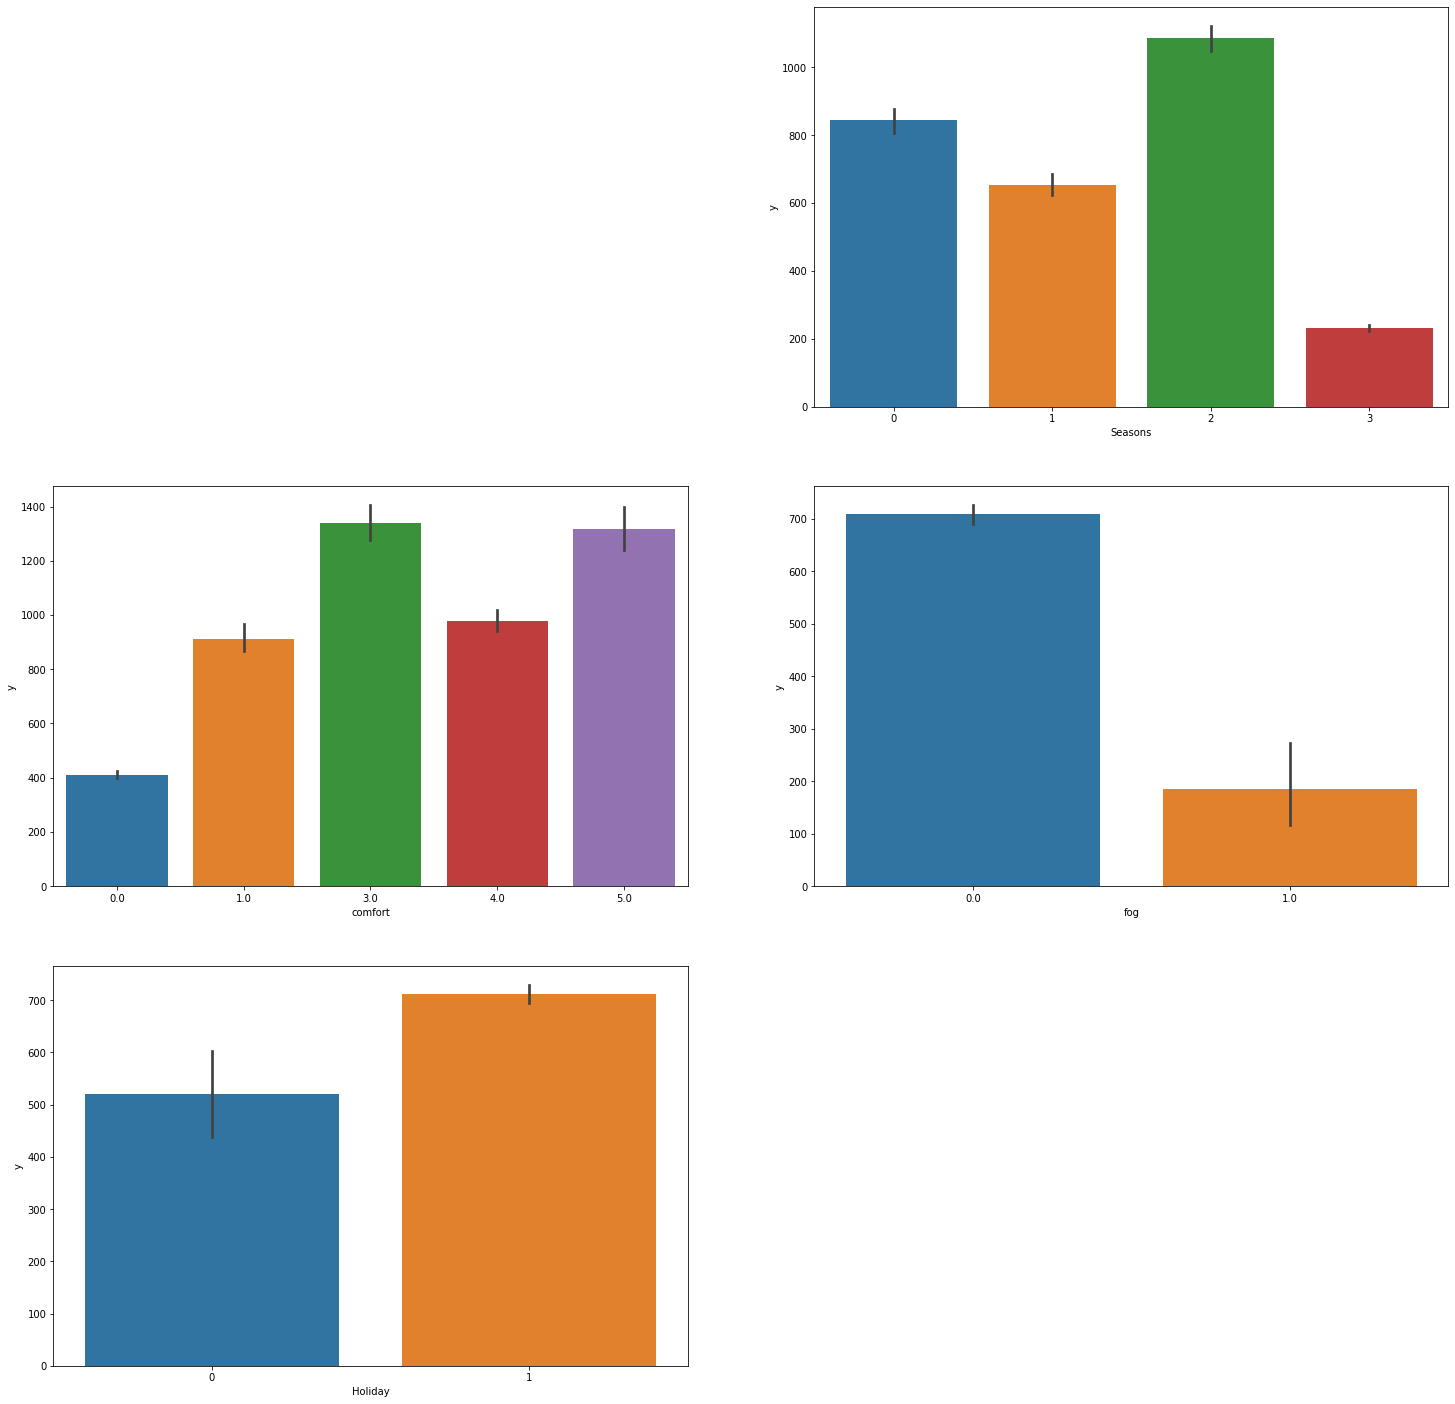

In [39]:
j = 0
plt.figure(figsize=(25, 25))
for i in weather_df: 
    j=j+1
    plt.subplot(3, 2, j+1)
    sns.barplot(weather_df[i],train_df["y"])
    plt.show

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


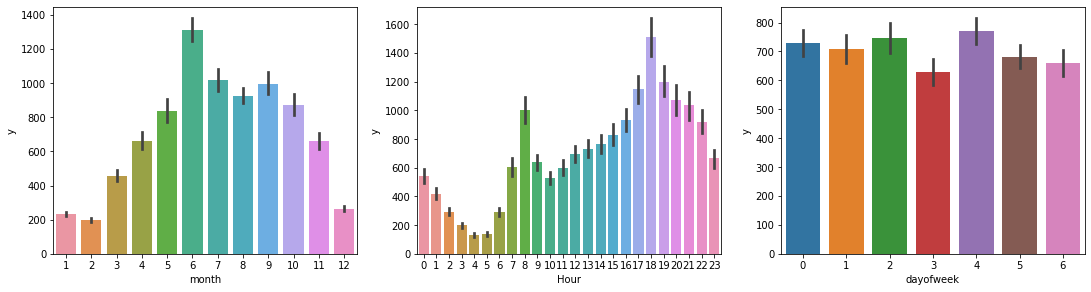

In [40]:
j = 0
plt.figure(figsize=(25, 10))
for i in date_df: 
    j=j+1
    plt.subplot(2, 4, j+1)
    sns.barplot(date_df[i],train_df["y"])
    plt.show

In [41]:
pd.DataFrame(train_df.groupby("month").y.sum()).sort_values(by="y")

,y
month,
2,96048
1,110552
12,127145
3,219941
11,316796
4,318283
5,402052
10,419809
8,444967


# spliting

In [42]:
x= train_df.drop(columns=['ID', 'y'])
y = train_df['y']
 
x["new date temp"].fillna(value= x["new date temp"].mean(), inplace=True)
# df.fillna(df.mean())
x_test["new date temp"].fillna(value= x_test["new date temp"].mean(), inplace=True)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x , y , test_size = 0.05, random_state = 29)

# Models pre

In [44]:
from math import sqrt
def RMSLE(y_pred , y_actual):
    n = y_pred.size 
    RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)
    return RMSLE

In [45]:
from sklearn.metrics import make_scorer
rmsle = make_scorer(RMSLE, greater_is_better=False)

# 1- RFG

In [46]:
from sklearn.ensemble import RandomForestRegressor


Regressor = RandomForestRegressor(n_estimators=12, max_depth=32,random_state=100)


Regressor = Regressor.fit(x_train, np.log1p(y_train))
y_pred_RF = np.exp(Regressor.predict(x_val))-1
y_1 =np.exp( Regressor.predict(x_train))-1


R = RMSLE(y_pred_RF , y_val)
R1 = RMSLE(y_1 , y_train)
print("RMSLE of RF :",R)
print("RMSLE of what model learn :",R1)

RMSLE of RF : 0.325413853951752
RMSLE of what model learn : 0.14757886622216015


# 2- HGBR

In [47]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [48]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingRegressor

# hist = HistGradientBoostingRegressor(max_bins=55, max_depth=5,max_iter=24,max_leaf_nodes=17)
# params = {"learning_rate": uniform(0.01, 0.9)
# }

# search = RandomizedSearchCV(hist, param_distributions=params,
#                             random_state=42, n_iter=200, cv=5, verbose=1,
#                             n_jobs=1, return_train_score=True,scoring = rmsle)

# search.fit(x_train, np.log1p(y_train))


In [49]:
# def report_best_scores(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")

# from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

# report_best_scores(search.cv_results_, 1)

In [50]:
x_train, x_val, y_train, y_val = train_test_split(x , y , test_size = 0.05, random_state = 270)

hgb = HistGradientBoostingRegressor(scoring=rmsle,early_stopping=True ,max_bins=164,learning_rate=0.3372666421413646,
                                    max_depth=5,max_iter=24,max_leaf_nodes=20,random_state=253)

In [51]:
hgb = hgb.fit(x_train, np.log1p(y_train))

y_pred_RF = np.exp(hgb.predict(x_val))-1
y_1 = np.exp(hgb.predict(x_train))-1


R = RMSLE(y_pred_RF , y_val)
R1 = RMSLE(y_1 , y_train)
print(" RMSLE of HGB  :",R)
print("RMSLE of what model learn :",R1)

 RMSLE of HGB  : 0.32922448661050197
RMSLE of what model learn : 0.30132604985531813


# 3- LGBM

In [52]:
import lightgbm as lgbm

In [53]:
x_train, x_val, y_train, y_val = train_test_split(x , y , test_size = 0.05, random_state = 138)
reg = lgbm.sklearn.LGBMRegressor(num_leaves=17,learning_rate =0.2179, max_depth=9,n_estimators= 44,subsample_for_bin=5472)

reg = reg.fit(x_train, np.log1p(y_train))

pred=np.expm1(reg.predict(x_val))
R = RMSLE(pred,y_val)
print("RMSLE of HGB kaggle on y_val:",R)
pred2=np.expm1(reg.predict(x_train))
R2 = RMSLE(pred2,y_train)
print("RMSLE of HGB on y_train:",R2)

RMSLE of HGB kaggle on y_val: 0.2897245091050575
RMSLE of HGB on y_train: 0.2601011555826332


# Submission

In [54]:
y_test_predicted = np.exp(reg.predict(x_test))-1

In [55]:
test = pd.read_csv("/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv")

submission = pd.DataFrame({
        "ID": test["ID"],
        "y": y_test_predicted
    })

In [56]:
submission.to_csv("submission.csv", index = False)

In [57]:
submission

,ID,y
0,5760,202.201467
1,5761,156.276700
2,5762,118.607542
3,5763,78.355455
4,5764,54.027405
...,...,...
2995,8755,1131.978620
2996,8756,1021.646713
2997,8757,1104.027357
2998,8758,903.892899
